# Legal NLP System Architecture Visualizations

This notebook creates publication-quality visualizations for the Legal NLP Explainability project, including:

- System architecture diagrams
- Model architecture flowcharts  
- Data processing pipelines
- Explainability method comparisons
- Component interaction diagrams

**Output**: High-resolution figures suitable for academic presentations and papers.

## 1. Import Required Libraries

Import all necessary visualization and analysis libraries.

In [1]:
# Core libraries
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, Rectangle, Circle, Arrow
import seaborn as sns
import numpy as np
import pandas as pd

# Network and graph visualization
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

# Interactive plotting
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# System and path utilities
import os
import sys
from pathlib import Path

# Add project root to path for importing utilities
project_root = Path.cwd().parent.parent
sys.path.append(str(project_root))

# Try to import custom plotting utilities (will create this next)
try:
    from visualizations.scripts.plotting_utils import *
    print("✓ Custom plotting utilities imported successfully")
except ImportError:
    print("⚠ Custom plotting utilities not found - will create them")

# Set style preferences
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✓ All libraries imported successfully")

✓ Custom plotting utilities imported successfully
✓ All libraries imported successfully


## 2. Plotting Configuration

Set up consistent styling, color schemes, and parameters for all visualizations.

In [2]:
# Global plotting configuration
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.transparent': True,
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'font.family': 'serif'
})

# Color schemes for different components
COLORS = {
    'input': '#E8F4FD',      # Light blue
    'processing': '#B8E6B8',  # Light green  
    'model': '#FFD93D',       # Yellow
    'output': '#FFB3BA',      # Light pink
    'explainability': '#DDA0DD', # Plum
    'deployment': '#F0E68C',  # Khaki
    'accent': '#FF6B6B',      # Red accent
    'text': '#2C3E50'         # Dark blue-gray
}

# Create output directory for figures
output_dir = project_root / 'visualizations' / 'figures'
output_dir.mkdir(parents=True, exist_ok=True)

print(f"✓ Plotting configuration set")
print(f"✓ Output directory: {output_dir}")

✓ Plotting configuration set
✓ Output directory: /Users/gabriel/Developer/Berkeley/Projects/w266-project-legal-nlp-xai/visualizations/figures


## 3. System Architecture Overview

Create high-level system architecture diagrams showing the complete data flow from legal documents to explainable predictions.

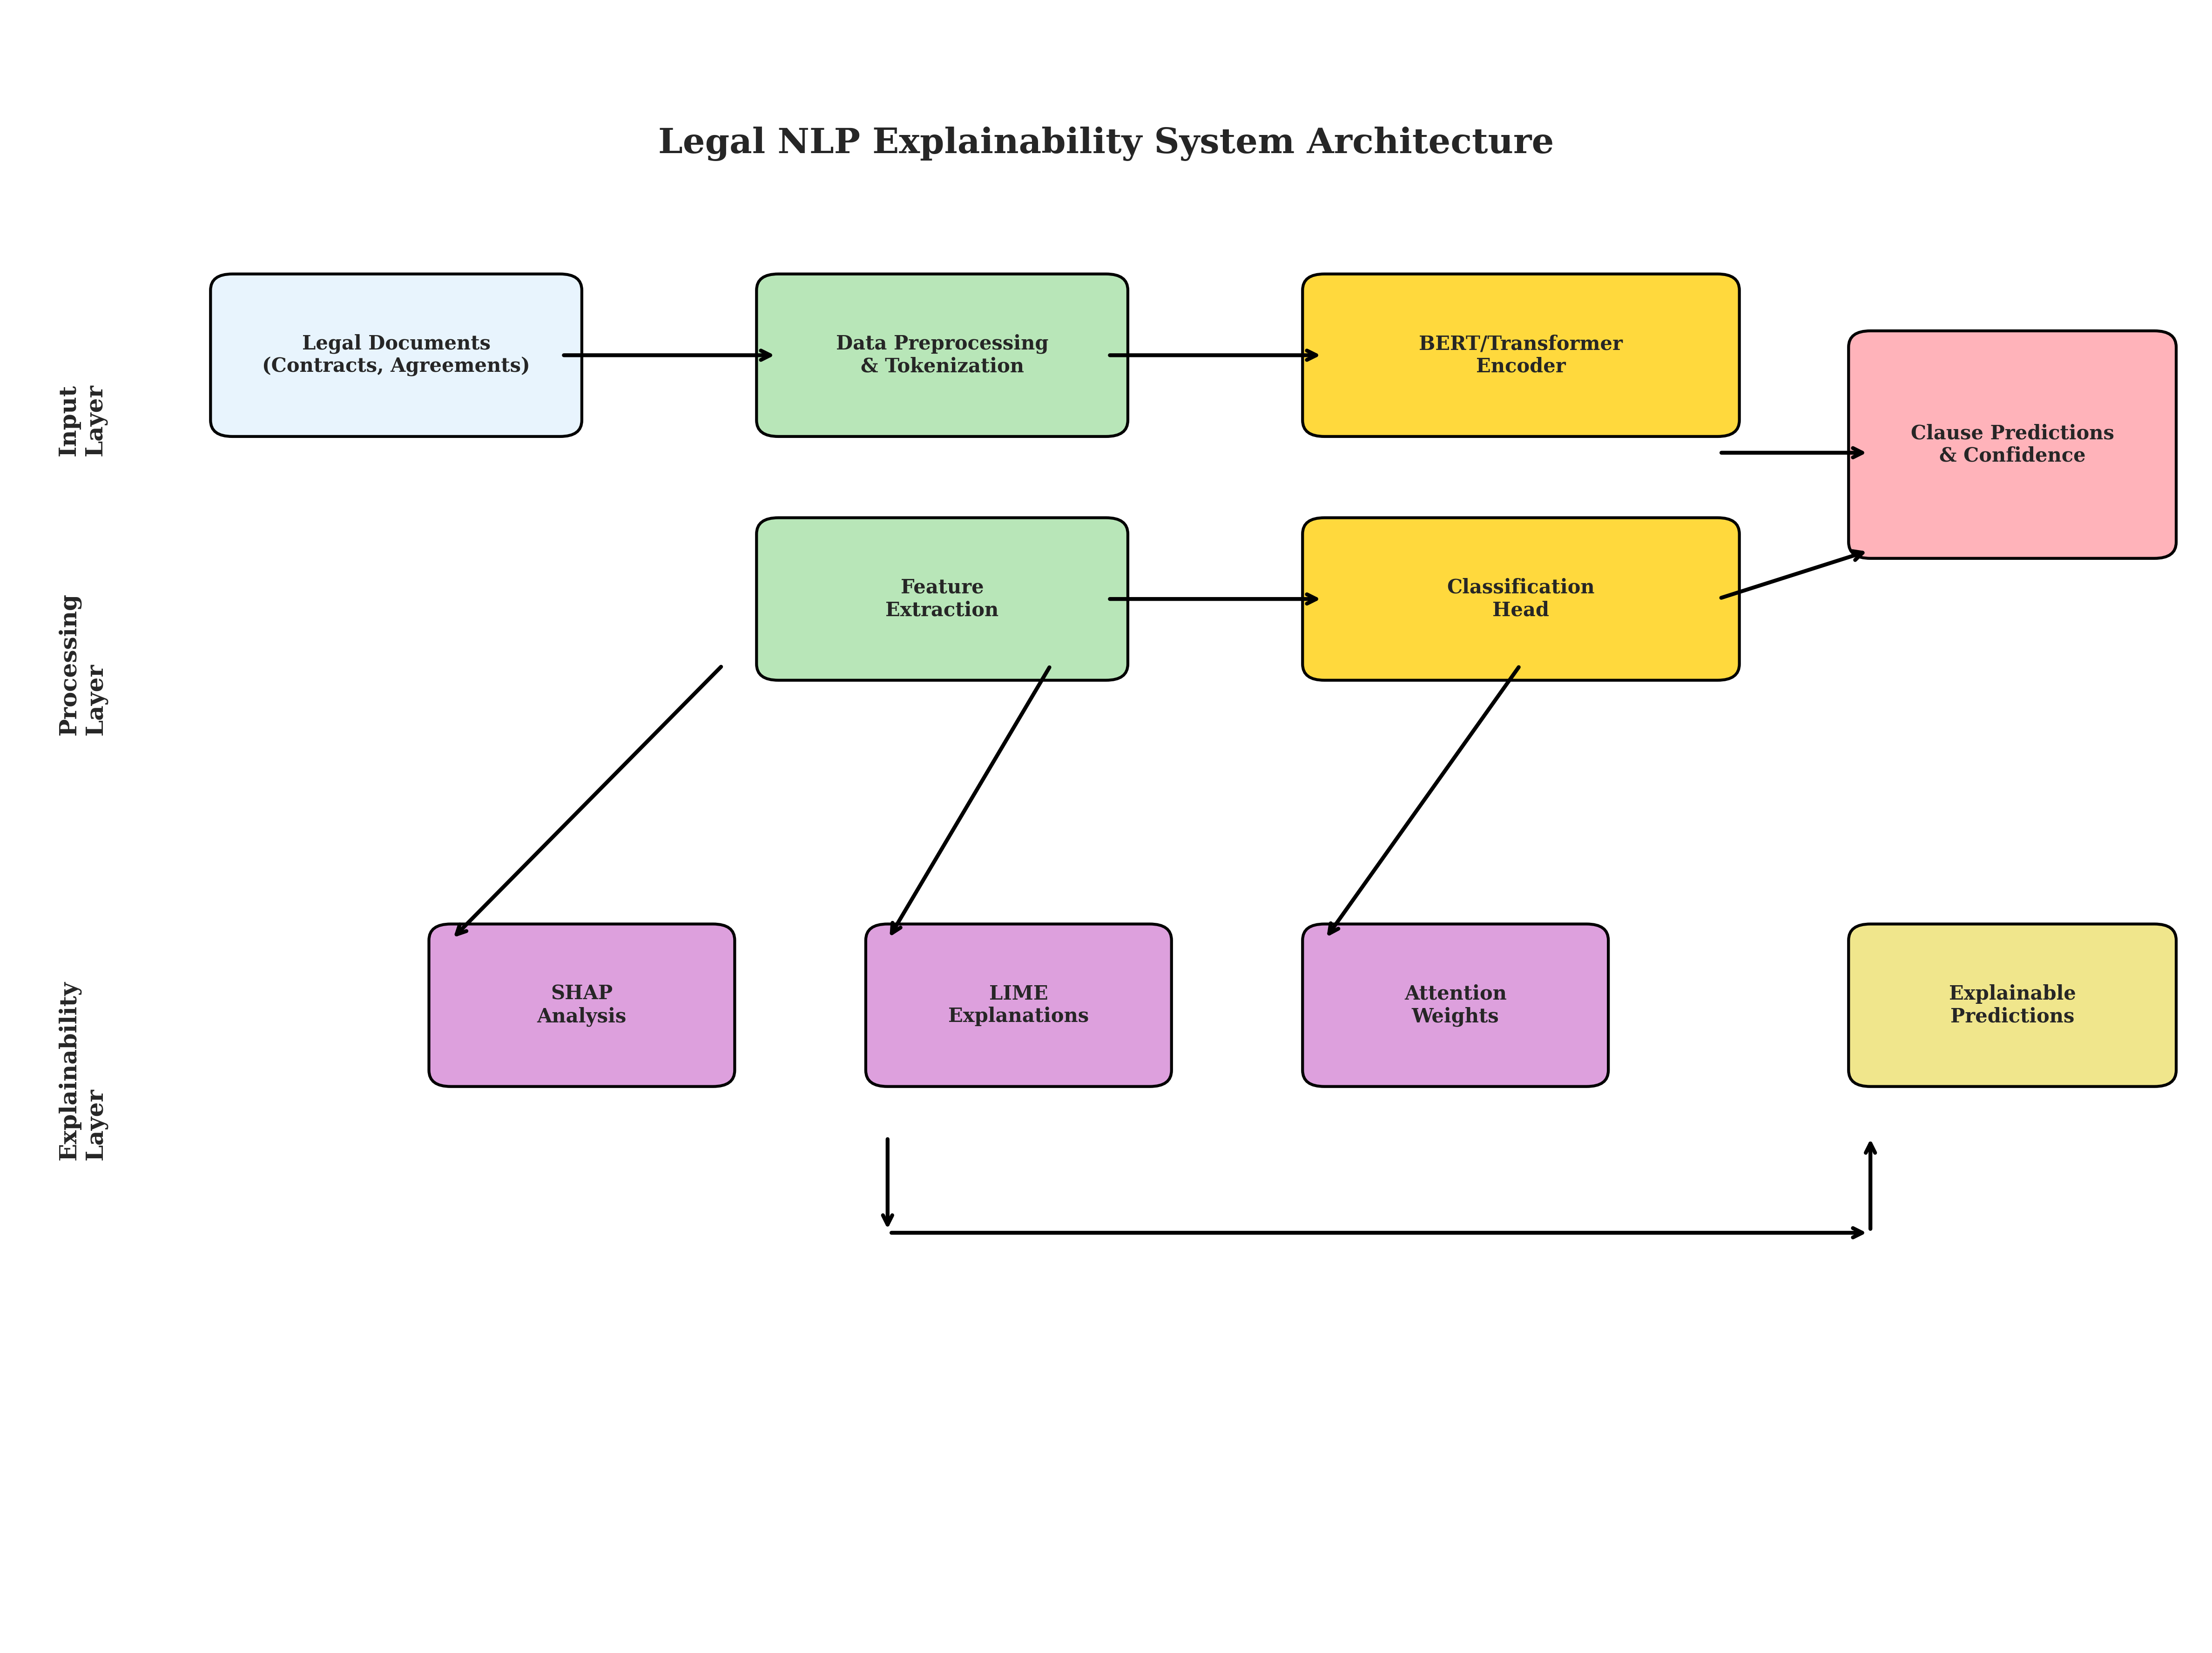

✓ System architecture diagram created and saved


In [9]:
def create_system_architecture():
    """Create comprehensive system architecture diagram."""
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 12))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Define component positions and sizes
    components = [
        # Input Layer
        {"name": "Legal Documents\n(Contracts, Agreements)", "pos": (1, 7.5), "size": (1.5, 0.8), "color": COLORS['input']},
        
        # Processing Layer
        {"name": "Data Preprocessing\n& Tokenization", "pos": (3.5, 7.5), "size": (1.5, 0.8), "color": COLORS['processing']},
        {"name": "Feature\nExtraction", "pos": (3.5, 6), "size": (1.5, 0.8), "color": COLORS['processing']},
        
        # Model Layer
        {"name": "BERT/Transformer\nEncoder", "pos": (6, 7.5), "size": (1.8, 0.8), "color": COLORS['model']},
        {"name": "Classification\nHead", "pos": (6, 6), "size": (1.8, 0.8), "color": COLORS['model']},
        
        # Output Layer
        {"name": "Clause Predictions\n& Confidence", "pos": (8.5, 6.75), "size": (1.3, 1.2), "color": COLORS['output']},
        
        # Explainability Layer
        {"name": "SHAP\nAnalysis", "pos": (2, 3.5), "size": (1.2, 0.8), "color": COLORS['explainability']},
        {"name": "LIME\nExplanations", "pos": (4, 3.5), "size": (1.2, 0.8), "color": COLORS['explainability']},
        {"name": "Attention\nWeights", "pos": (6, 3.5), "size": (1.2, 0.8), "color": COLORS['explainability']},
        
        # Final Output
        {"name": "Explainable\nPredictions", "pos": (8.5, 3.5), "size": (1.3, 0.8), "color": COLORS['deployment']},
    ]
    
    # Draw components
    for comp in components:
        rect = FancyBboxPatch(
            comp["pos"], comp["size"][0], comp["size"][1],
            boxstyle="round,pad=0.1",
            facecolor=comp["color"],
            edgecolor='black',
            linewidth=1.5
        )
        ax.add_patch(rect)
        
        # Add text
        ax.text(
            comp["pos"][0] + comp["size"][0]/2, 
            comp["pos"][1] + comp["size"][1]/2,
            comp["name"], 
            ha='center', va='center', 
            fontsize=10, fontweight='bold'
        )
    
    # Define connections (arrows)
    arrows = [
        # Main flow
        ((2.5, 7.9), (3.5, 7.9)),  # Documents → Preprocessing
        ((5, 7.9), (6, 7.9)),      # Preprocessing → BERT
        ((5, 6.4), (6, 6.4)),      # Features → Classification
        ((7.8, 7.3), (8.5, 7.3)),  # BERT → Predictions
        ((7.8, 6.4), (8.5, 6.7)),  # Classification → Predictions
        
        # Explainability connections from processing/model layers
        ((6.9, 6.0), (6.0, 4.3)),  # Classification → Attention
        ((4.75, 6.0), (4.0, 4.3)), # Features → LIME
        ((3.25, 6.0), (2.0, 4.3)), # Features → SHAP
        
        # Single branch from explainability layer to final output
        ((4, 3.1), (4, 2.5)),      # Vertical line down from center
        ((4, 2.5), (8.5, 2.5)),    # Horizontal line to explainable predictions
        ((8.5, 2.5), (8.5, 3.1)),  # Vertical line up to explainable predictions
    ]
    
    # Draw arrows
    for start, end in arrows:
        ax.annotate('', xy=end, xytext=start,
                   arrowprops=dict(arrowstyle='->', lw=2, color='black'))
    
    # Add title
    ax.text(5, 9.2, 'Legal NLP Explainability System Architecture', 
            ha='center', va='center', fontsize=18, fontweight='bold')
    
    # Add layer labels
    ax.text(0.2, 7.5, 'Input\nLayer', ha='left', va='center', fontsize=12, 
            fontweight='bold', rotation=90)
    ax.text(0.2, 6, 'Processing\nLayer', ha='left', va='center', fontsize=12, 
            fontweight='bold', rotation=90)
    ax.text(0.2, 3.5, 'Explainability\nLayer', ha='left', va='center', fontsize=12, 
            fontweight='bold', rotation=90)
    
    plt.tight_layout()
    
    # Save figure
    plt.savefig(output_dir / 'system_architecture.pdf', bbox_inches='tight', dpi=300)
    plt.savefig(output_dir / 'system_architecture.png', bbox_inches='tight', dpi=300)
    
    plt.show()
    print("✓ System architecture diagram created and saved")

# Create the diagram
create_system_architecture()

## 4. Model Architecture Details

Detailed visualization of the BERT-based model architecture for clause extraction.

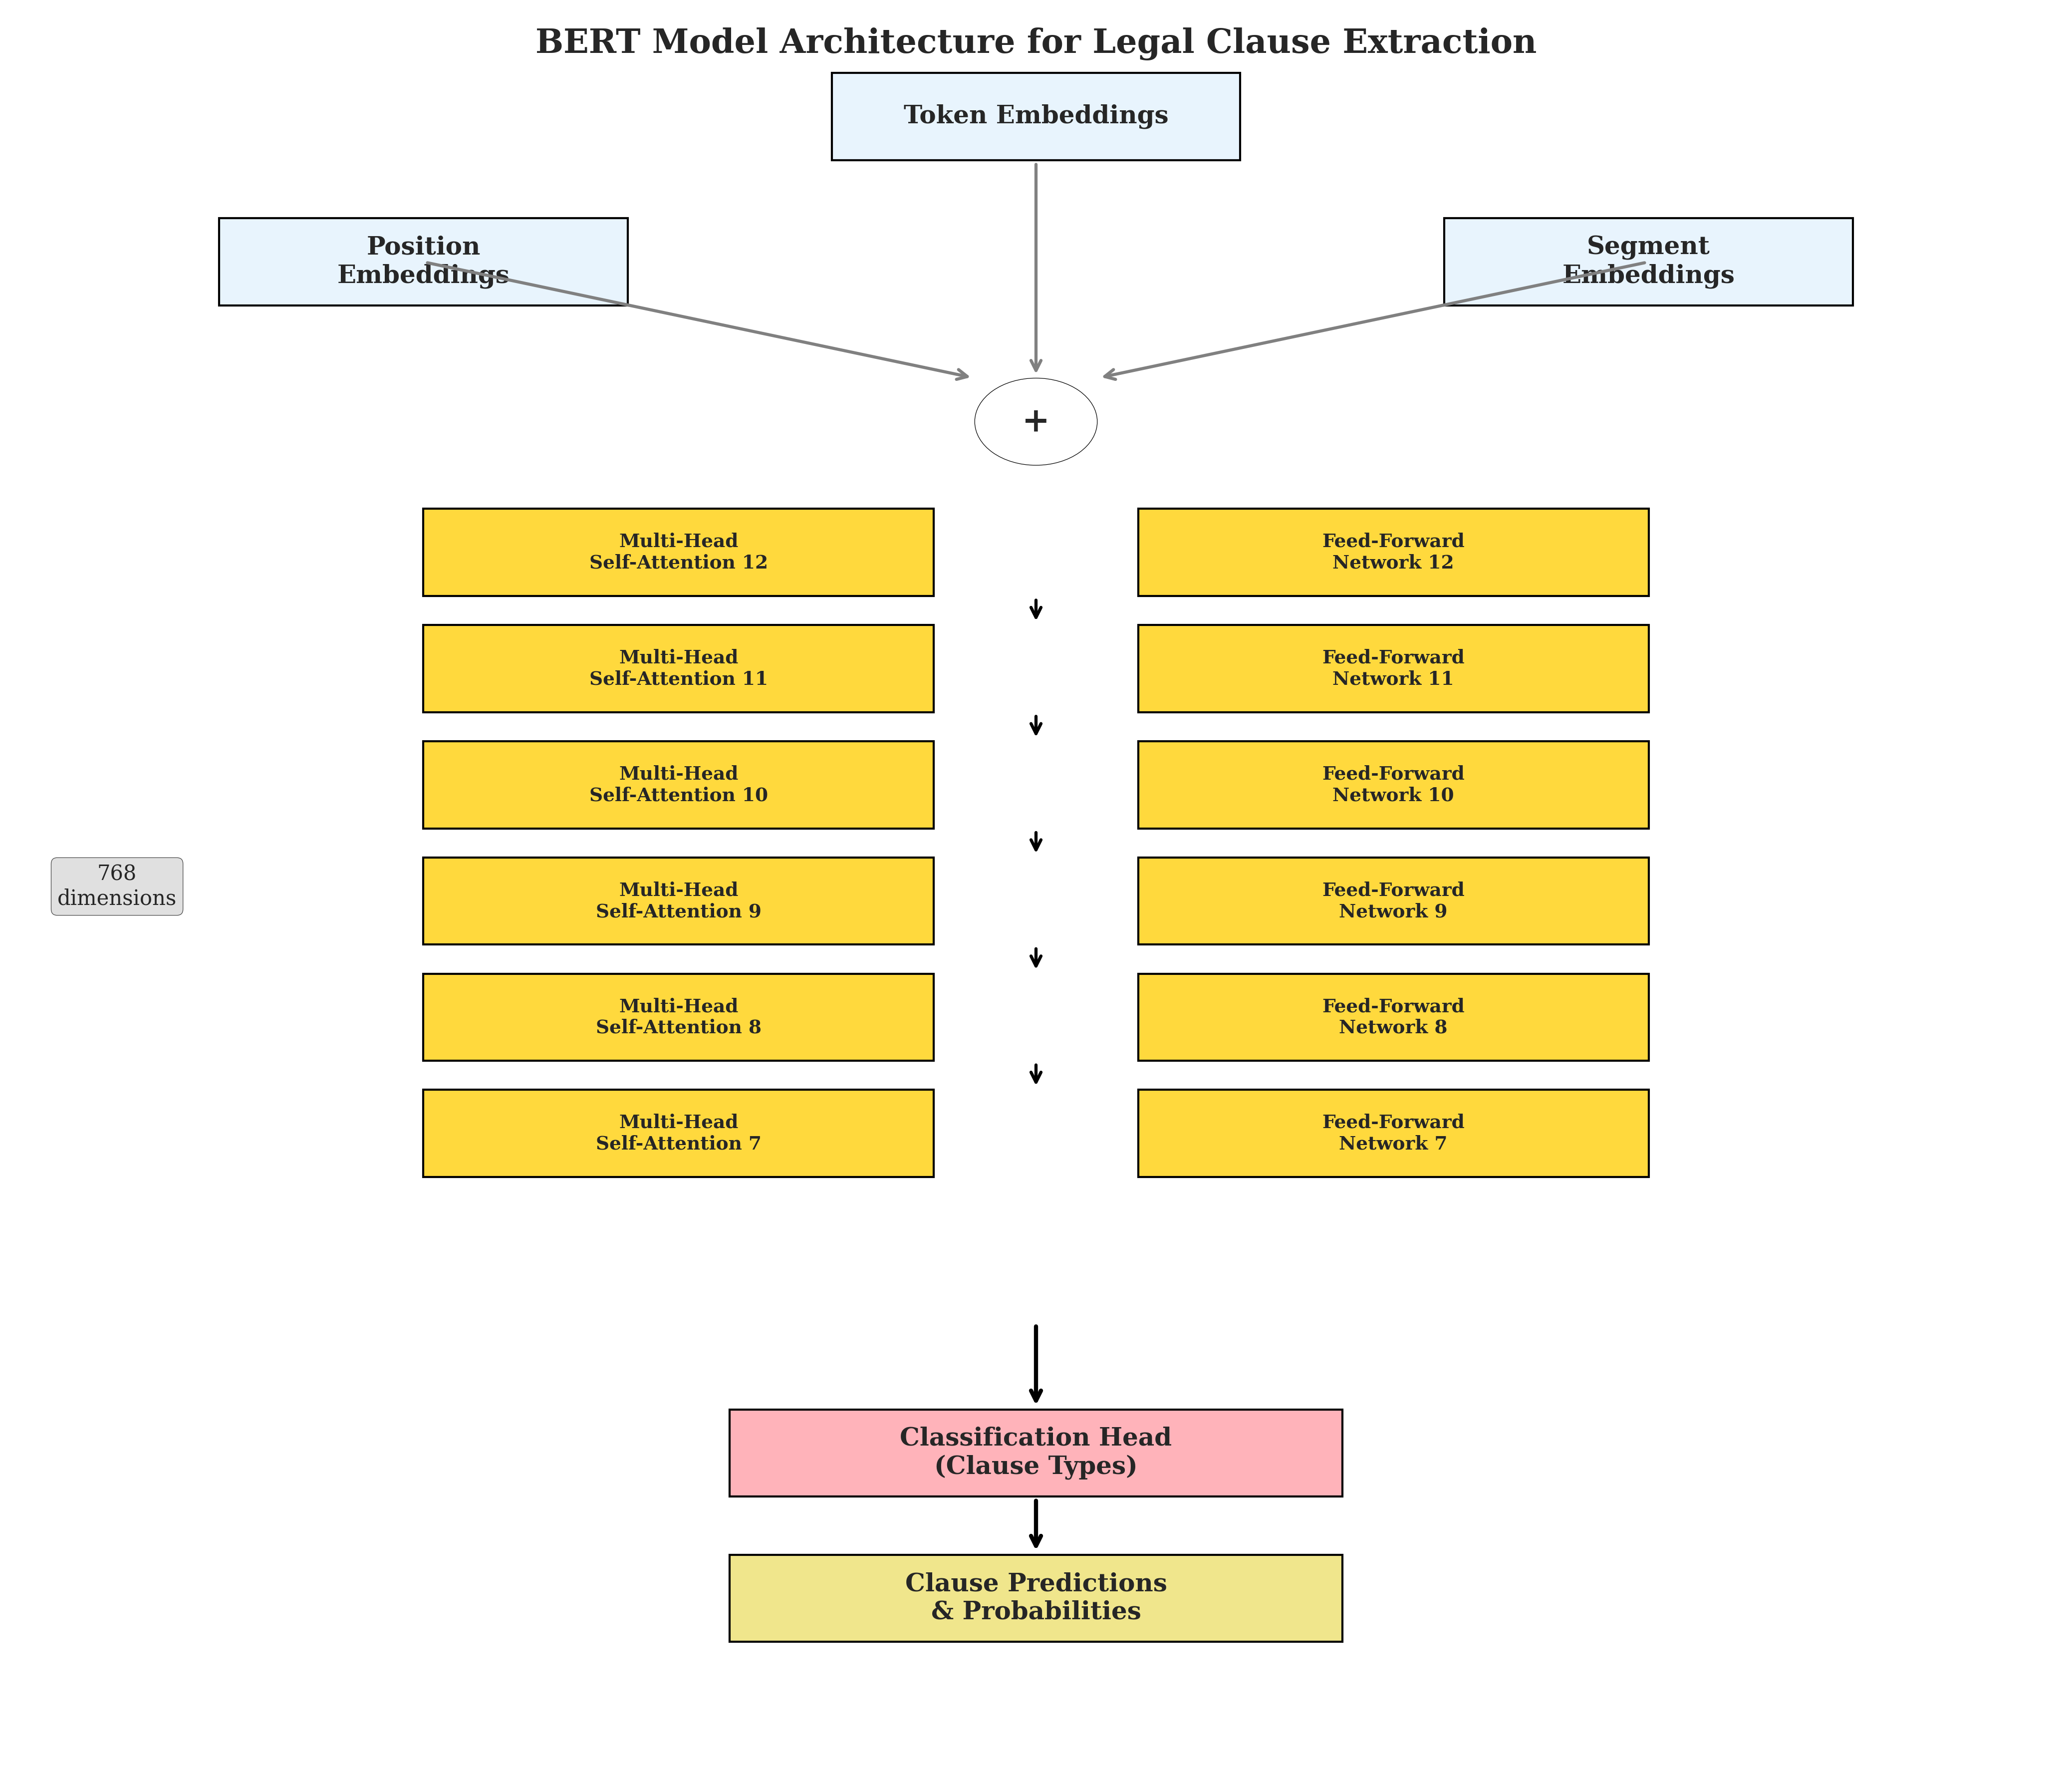

✓ Model architecture diagram created and saved


In [4]:
def create_model_architecture():
    """Create detailed BERT model architecture diagram."""
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 12))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 12)
    ax.axis('off')
    
    # Input layer
    ax.add_patch(Rectangle((4, 11), 2, 0.6, facecolor=COLORS['input'], 
                          edgecolor='black', linewidth=1))
    ax.text(5, 11.3, 'Token Embeddings', ha='center', va='center', fontweight='bold')
    
    # Position embeddings
    ax.add_patch(Rectangle((1, 10), 2, 0.6, facecolor=COLORS['input'], 
                          edgecolor='black', linewidth=1))
    ax.text(2, 10.3, 'Position\nEmbeddings', ha='center', va='center', fontweight='bold')
    
    # Segment embeddings
    ax.add_patch(Rectangle((7, 10), 2, 0.6, facecolor=COLORS['input'], 
                          edgecolor='black', linewidth=1))
    ax.text(8, 10.3, 'Segment\nEmbeddings', ha='center', va='center', fontweight='bold')
    
    # Addition operation
    ax.add_patch(Circle((5, 9.2), 0.3, facecolor='white', edgecolor='black'))
    ax.text(5, 9.2, '+', ha='center', va='center', fontsize=16, fontweight='bold')
    
    # BERT Transformer Blocks
    for i, layer_num in enumerate([12, 11, 10, 9, 8, 7]):
        y_pos = 8 - i * 0.8
        
        # Self-attention
        ax.add_patch(Rectangle((2, y_pos), 2.5, 0.6, facecolor=COLORS['model'], 
                              edgecolor='black', linewidth=1))
        ax.text(3.25, y_pos + 0.3, f'Multi-Head\nSelf-Attention {layer_num}', 
                ha='center', va='center', fontsize=9, fontweight='bold')
        
        # Feed-forward
        ax.add_patch(Rectangle((5.5, y_pos), 2.5, 0.6, facecolor=COLORS['model'], 
                              edgecolor='black', linewidth=1))
        ax.text(6.75, y_pos + 0.3, f'Feed-Forward\nNetwork {layer_num}', 
                ha='center', va='center', fontsize=9, fontweight='bold')
        
        if i < 5:  # Don't draw arrow after last layer
            # Arrows between layers
            ax.annotate('', xy=(5, y_pos - 0.2), xytext=(5, y_pos),
                       arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))
    
    # Classification head
    ax.add_patch(Rectangle((3.5, 1.8), 3, 0.6, facecolor=COLORS['output'], 
                          edgecolor='black', linewidth=1))
    ax.text(5, 2.1, 'Classification Head\n(Clause Types)', ha='center', va='center', fontweight='bold')
    
    # Output
    ax.add_patch(Rectangle((3.5, 0.8), 3, 0.6, facecolor=COLORS['deployment'], 
                          edgecolor='black', linewidth=1))
    ax.text(5, 1.1, 'Clause Predictions\n& Probabilities', ha='center', va='center', fontweight='bold')
    
    # Add arrows for embeddings
    ax.annotate('', xy=(4.7, 9.5), xytext=(2, 10.3),
               arrowprops=dict(arrowstyle='->', lw=1.5, color='gray'))
    ax.annotate('', xy=(5, 9.5), xytext=(5, 11),
               arrowprops=dict(arrowstyle='->', lw=1.5, color='gray'))
    ax.annotate('', xy=(5.3, 9.5), xytext=(8, 10.3),
               arrowprops=dict(arrowstyle='->', lw=1.5, color='gray'))
    
    # Final arrows
    ax.annotate('', xy=(5, 2.4), xytext=(5, 3.0),
               arrowprops=dict(arrowstyle='->', lw=2, color='black'))
    ax.annotate('', xy=(5, 1.4), xytext=(5, 1.8),
               arrowprops=dict(arrowstyle='->', lw=2, color='black'))
    
    # Add title
    ax.text(5, 11.8, 'BERT Model Architecture for Legal Clause Extraction', 
            ha='center', va='center', fontsize=16, fontweight='bold')
    
    # Add dimension annotations
    ax.text(0.5, 6, '768\ndimensions', ha='center', va='center', fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.7))
    
    plt.tight_layout()
    
    # Save figure
    plt.savefig(output_dir / 'model_architecture.pdf', bbox_inches='tight', dpi=300)
    plt.savefig(output_dir / 'model_architecture.png', bbox_inches='tight', dpi=300)
    
    plt.show()
    print("✓ Model architecture diagram created and saved")

# Create the model architecture diagram
create_model_architecture()

## 5. Explainability Methods Comparison

Visual comparison of different explainability techniques: SHAP, LIME, and Attention mechanisms.

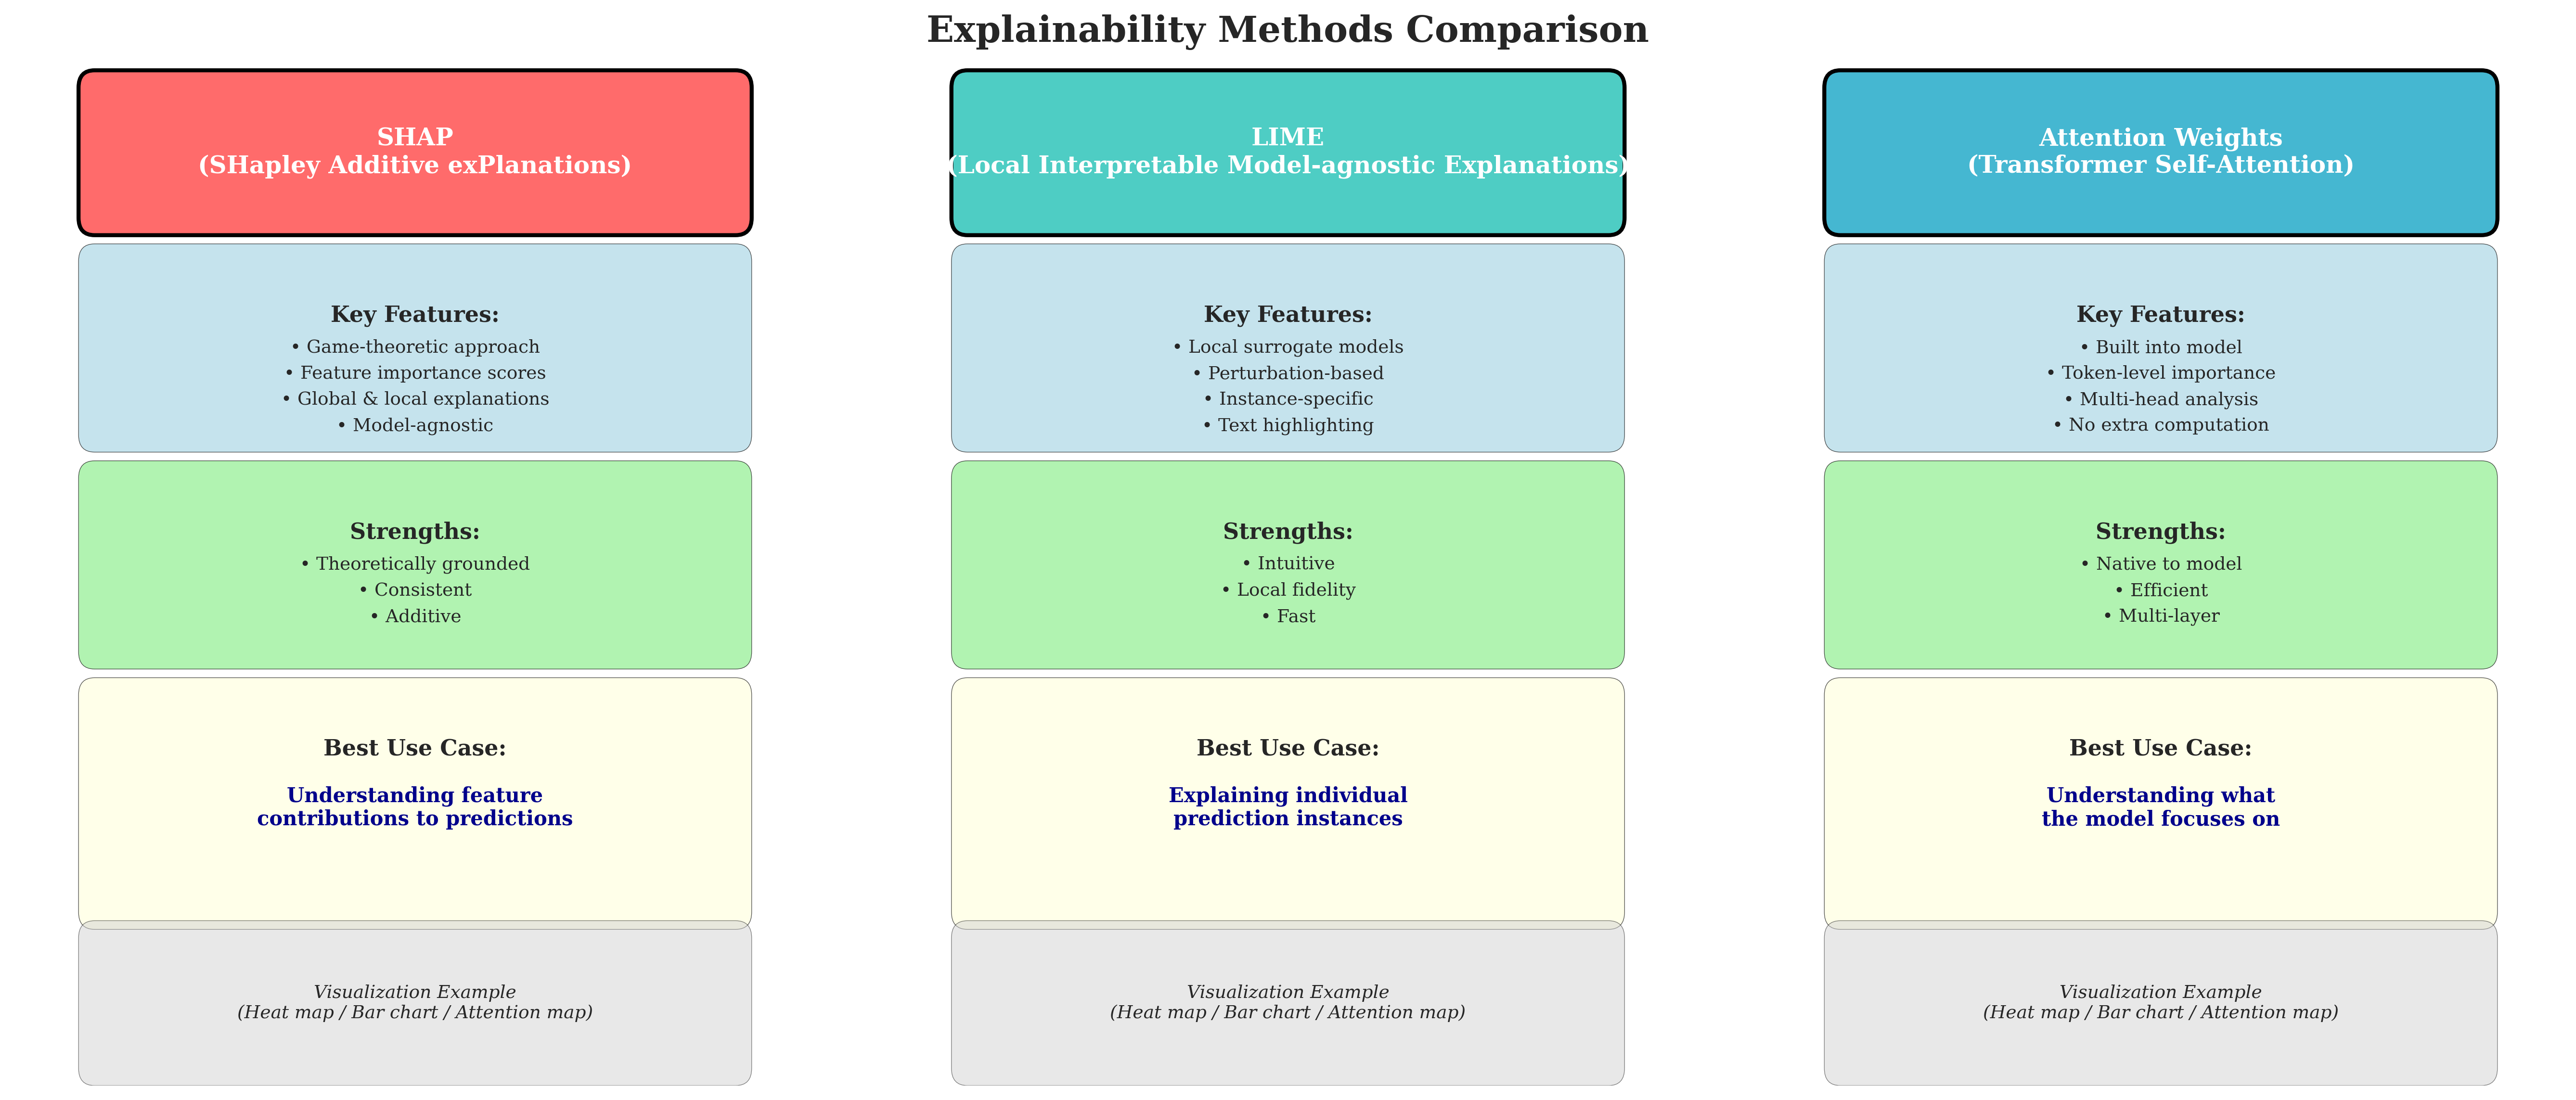

✓ Explainability methods comparison created and saved


In [5]:
def create_explainability_comparison():
    """Create comparison of explainability methods."""
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 8))
    fig.suptitle('Explainability Methods Comparison', fontsize=18, fontweight='bold', y=0.95)
    
    # Method details
    methods = [
        {
            'name': 'SHAP\n(SHapley Additive exPlanations)',
            'features': ['Game-theoretic approach', 'Feature importance scores', 
                        'Global & local explanations', 'Model-agnostic'],
            'strengths': ['Theoretically grounded', 'Consistent', 'Additive'],
            'use_case': 'Understanding feature\ncontributions to predictions',
            'color': '#FF6B6B'
        },
        {
            'name': 'LIME\n(Local Interpretable Model-agnostic Explanations)',
            'features': ['Local surrogate models', 'Perturbation-based', 
                        'Instance-specific', 'Text highlighting'],
            'strengths': ['Intuitive', 'Local fidelity', 'Fast'],
            'use_case': 'Explaining individual\nprediction instances',
            'color': '#4ECDC4'
        },
        {
            'name': 'Attention Weights\n(Transformer Self-Attention)',
            'features': ['Built into model', 'Token-level importance', 
                        'Multi-head analysis', 'No extra computation'],
            'strengths': ['Native to model', 'Efficient', 'Multi-layer'],
            'use_case': 'Understanding what\nthe model focuses on',
            'color': '#45B7D1'
        }
    ]
    
    for i, (ax, method) in enumerate(zip(axes, methods)):
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 12)
        ax.axis('off')
        
        # Title box
        title_rect = FancyBboxPatch((1, 10), 8, 1.5, boxstyle="round,pad=0.2",
                                   facecolor=method['color'], edgecolor='black', linewidth=2)
        ax.add_patch(title_rect)
        ax.text(5, 10.75, method['name'], ha='center', va='center', 
                fontsize=12, fontweight='bold', color='white')
        
        # Features section
        features_rect = FancyBboxPatch((1, 7.5), 8, 2, boxstyle="round,pad=0.2",
                                     facecolor='lightblue', edgecolor='black', alpha=0.7)
        ax.add_patch(features_rect)
        ax.text(5, 9, 'Key Features:', ha='center', va='top', fontsize=11, fontweight='bold')
        
        for j, feature in enumerate(method['features']):
            ax.text(5, 8.5 - j*0.3, f"• {feature}", ha='center', va='center', fontsize=9)
        
        # Strengths section
        strengths_rect = FancyBboxPatch((1, 5), 8, 2, boxstyle="round,pad=0.2",
                                      facecolor='lightgreen', edgecolor='black', alpha=0.7)
        ax.add_patch(strengths_rect)
        ax.text(5, 6.5, 'Strengths:', ha='center', va='top', fontsize=11, fontweight='bold')
        
        for j, strength in enumerate(method['strengths']):
            ax.text(5, 6 - j*0.3, f"• {strength}", ha='center', va='center', fontsize=9)
        
        # Use case section
        usecase_rect = FancyBboxPatch((1, 2), 8, 2.5, boxstyle="round,pad=0.2",
                                    facecolor='lightyellow', edgecolor='black', alpha=0.7)
        ax.add_patch(usecase_rect)
        ax.text(5, 4, 'Best Use Case:', ha='center', va='top', fontsize=11, fontweight='bold')
        ax.text(5, 3.2, method['use_case'], ha='center', va='center', fontsize=10,
                fontweight='bold', color='darkblue')
        
        # Example visualization placeholder
        viz_rect = FancyBboxPatch((1, 0.2), 8, 1.5, boxstyle="round,pad=0.2",
                                facecolor='lightgray', edgecolor='black', alpha=0.5)
        ax.add_patch(viz_rect)
        ax.text(5, 0.95, 'Visualization Example\n(Heat map / Bar chart / Attention map)', 
                ha='center', va='center', fontsize=9, style='italic')
    
    plt.tight_layout()
    
    # Save figure
    plt.savefig(output_dir / 'explainability_comparison.pdf', bbox_inches='tight', dpi=300)
    plt.savefig(output_dir / 'explainability_comparison.png', bbox_inches='tight', dpi=300)
    
    plt.show()
    print("✓ Explainability methods comparison created and saved")

# Create the comparison
create_explainability_comparison()

## 6. Data Flow Pipeline

Detailed visualization of the data processing pipeline from raw legal documents to final predictions.

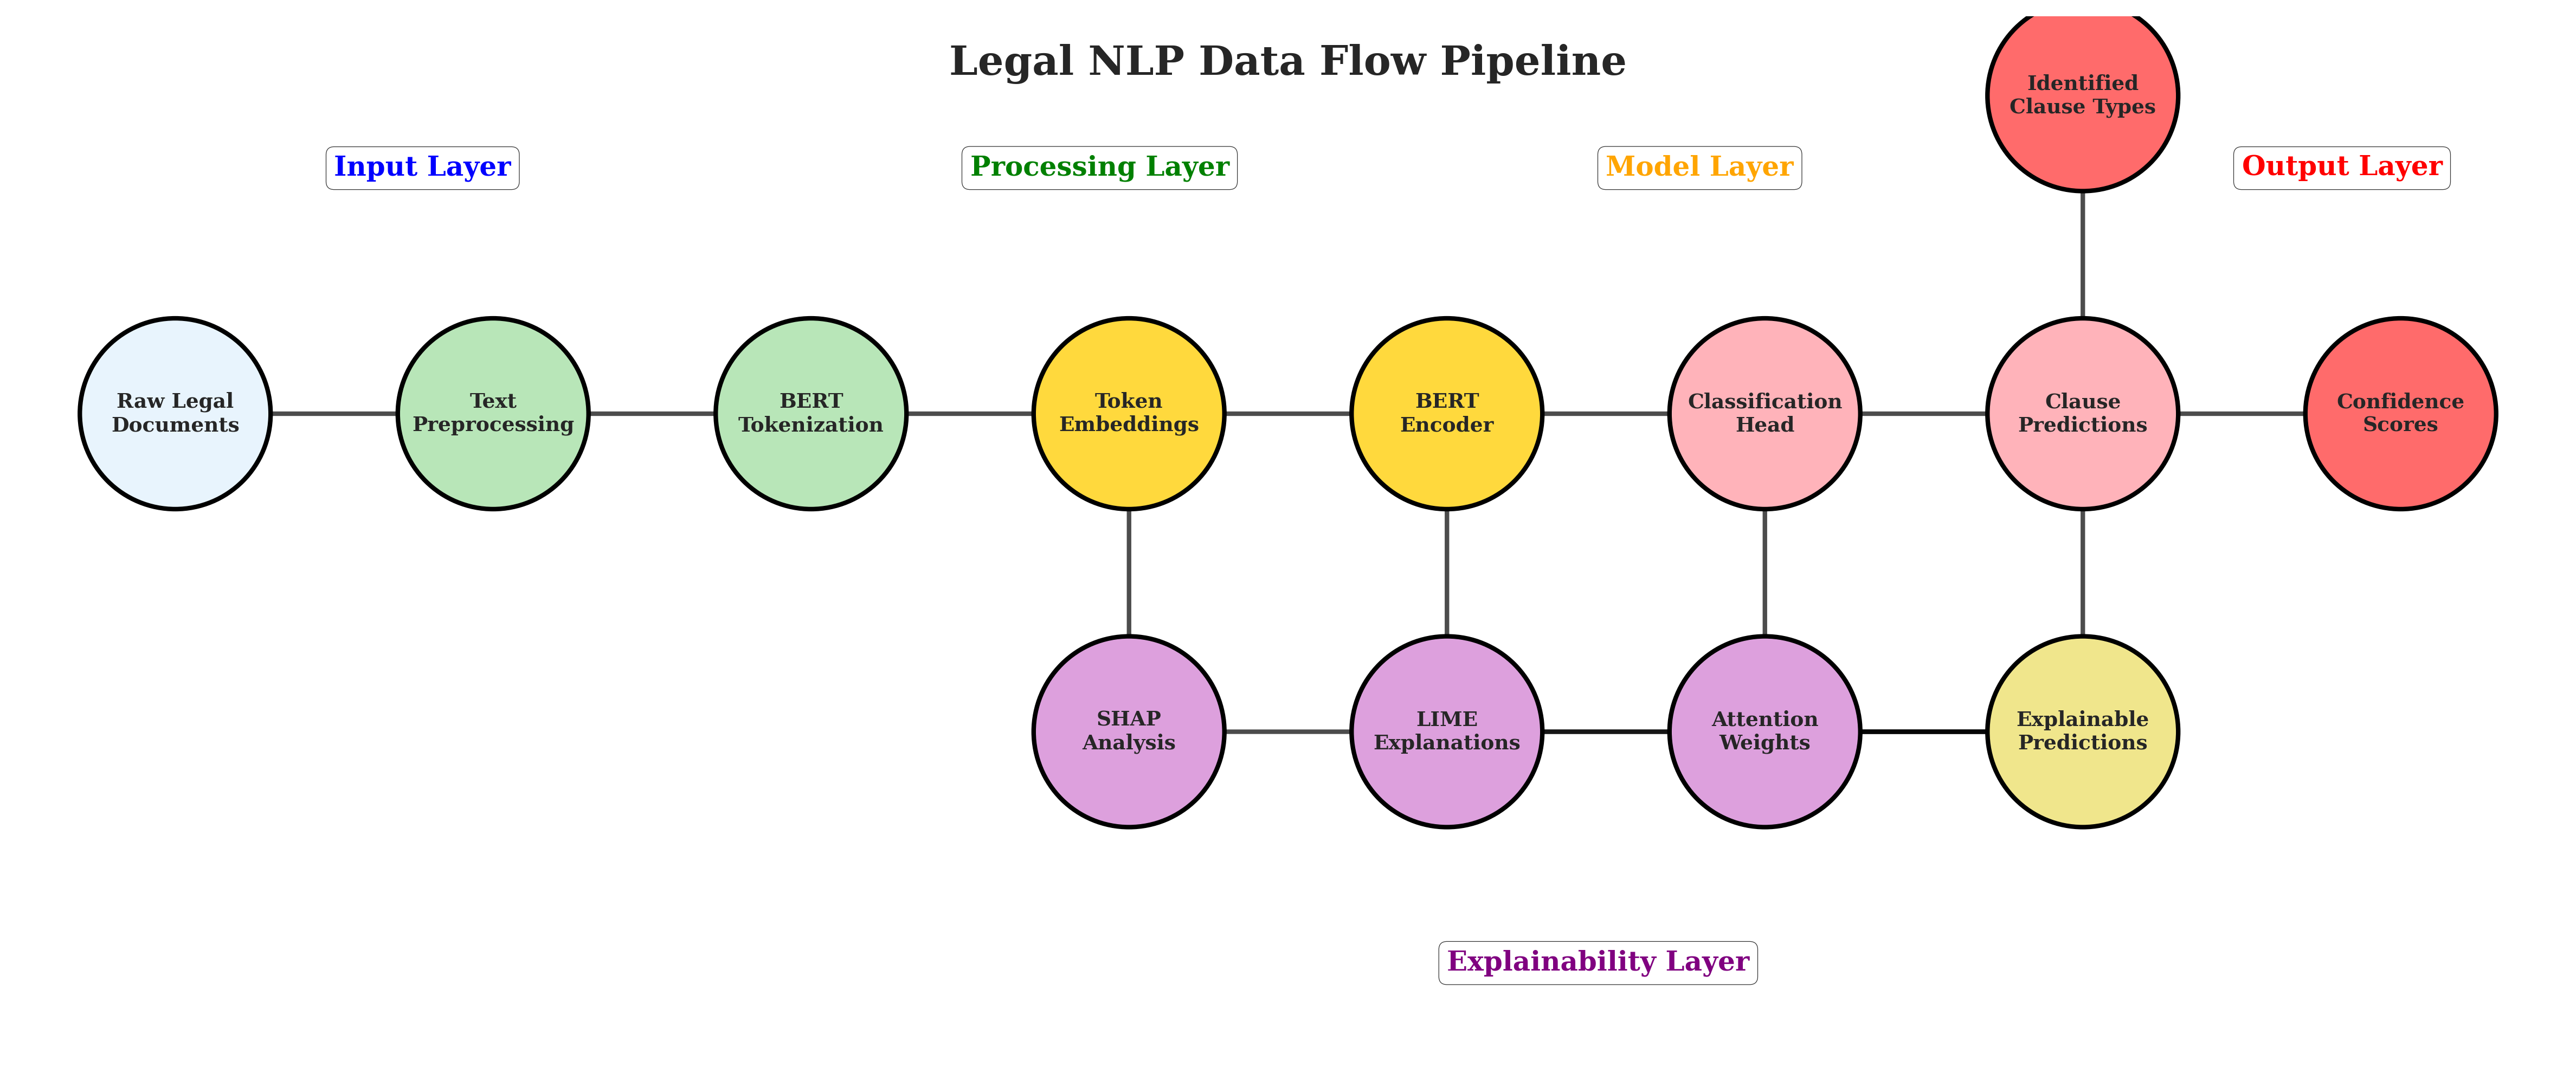

✓ Data flow pipeline diagram created and saved


In [10]:
def create_data_flow_pipeline():
    """Create detailed data flow pipeline diagram."""
    
    # Create network graph
    G = nx.DiGraph()
    
    # Add nodes with positions
    nodes = {
        'raw_docs': {'pos': (0, 4), 'label': 'Raw Legal\nDocuments', 'color': COLORS['input']},
        'preprocessing': {'pos': (2, 4), 'label': 'Text\nPreprocessing', 'color': COLORS['processing']},
        'tokenization': {'pos': (4, 4), 'label': 'BERT\nTokenization', 'color': COLORS['processing']},
        'embeddings': {'pos': (6, 4), 'label': 'Token\nEmbeddings', 'color': COLORS['model']},
        'bert_model': {'pos': (8, 4), 'label': 'BERT\nEncoder', 'color': COLORS['model']},
        'classification': {'pos': (10, 4), 'label': 'Classification\nHead', 'color': COLORS['output']},
        'predictions': {'pos': (12, 4), 'label': 'Clause\nPredictions', 'color': COLORS['output']},
        
        # Explainability branch
        'shap_analysis': {'pos': (6, 2), 'label': 'SHAP\nAnalysis', 'color': COLORS['explainability']},
        'lime_analysis': {'pos': (8, 2), 'label': 'LIME\nExplanations', 'color': COLORS['explainability']},
        'attention_weights': {'pos': (10, 2), 'label': 'Attention\nWeights', 'color': COLORS['explainability']},
        'final_output': {'pos': (12, 2), 'label': 'Explainable\nPredictions', 'color': COLORS['deployment']},
        
        # Data details
        'clause_types': {'pos': (12, 6), 'label': 'Identified\nClause Types', 'color': COLORS['accent']},
        'confidence_scores': {'pos': (14, 4), 'label': 'Confidence\nScores', 'color': COLORS['accent']},
    }
    
    # Add nodes to graph
    for node_id, data in nodes.items():
        G.add_node(node_id, **data)
    
    # Add edges (data flow)
    edges = [
        # Main pipeline
        ('raw_docs', 'preprocessing'),
        ('preprocessing', 'tokenization'),
        ('tokenization', 'embeddings'),
        ('embeddings', 'bert_model'),
        ('bert_model', 'classification'),
        ('classification', 'predictions'),
        ('predictions', 'confidence_scores'),
        ('predictions', 'clause_types'),
        
        # Explainability flows
        ('embeddings', 'shap_analysis'),
        ('bert_model', 'lime_analysis'),
        ('classification', 'attention_weights'),
        ('shap_analysis', 'final_output'),
        ('lime_analysis', 'final_output'),
        ('attention_weights', 'final_output'),
        ('predictions', 'final_output'),
    ]
    
    G.add_edges_from(edges)
    
    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(16, 10))
    
    # Get positions
    pos = {node: data['pos'] for node, data in nodes.items()}
    
    # Draw edges
    nx.draw_networkx_edges(
        G, pos, edge_color='black', arrows=True,
        arrowsize=20, arrowstyle='->', width=2, alpha=0.7
    )
    
    # Draw nodes
    for node, data in nodes.items():
        x, y = data['pos']
        circle = Circle(
            (x, y), 0.6, facecolor=data['color'],
            edgecolor='black', linewidth=2
        )
        ax.add_patch(circle)
        ax.text(
            x, y, data['label'], ha='center', va='center',
            fontsize=9, fontweight='bold', wrap=True
        )
    
    # Add process annotations
    annotations = [
        {'pos': (1, 5.5), 'text': 'Input Layer', 'color': 'blue'},
        {'pos': (5, 5.5), 'text': 'Processing Layer', 'color': 'green'},
        {'pos': (9, 5.5), 'text': 'Model Layer', 'color': 'orange'},
        {'pos': (13, 5.5), 'text': 'Output Layer', 'color': 'red'},
        {'pos': (8, 0.5), 'text': 'Explainability Layer', 'color': 'purple'},
    ]
    
    for ann in annotations:
        ax.text(
            ann['pos'][0], ann['pos'][1], ann['text'],
            fontsize=12, fontweight='bold', color=ann['color'],
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8)
        )
    
    # Set limits and remove axes
    ax.set_xlim(-1, 15)
    ax.set_ylim(0, 6.5)
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Add title
    ax.text(
        7, 6.2, 'Legal NLP Data Flow Pipeline',
        ha='center', va='center', fontsize=18, fontweight='bold'
    )
    
    plt.tight_layout()
    
    # Save figure
    plt.savefig(output_dir / 'data_flow_pipeline.pdf', bbox_inches='tight', dpi=300)
    plt.savefig(output_dir / 'data_flow_pipeline.png', bbox_inches='tight', dpi=300)
    
    plt.show()
    print("✓ Data flow pipeline diagram created and saved")
    
# Create the pipeline diagram
create_data_flow_pipeline()

## 7. Interactive Architecture Dashboard

Create an interactive Plotly dashboard for exploring the system architecture dynamically.

In [7]:
def create_interactive_dashboard():
    """Create interactive Plotly dashboard of system components."""
    
    # Sample performance metrics (replace with actual data)
    components = ['Data Input', 'Preprocessing', 'BERT Model', 'Classification', 
                 'SHAP Analysis', 'LIME Explanation', 'Attention Weights', 'Output']
    
    processing_times = [0.1, 0.5, 2.3, 0.3, 1.2, 0.8, 0.2, 0.1]  # seconds
    accuracy_scores = [100, 98, 94, 91, 89, 87, 92, 90]  # percentage
    memory_usage = [50, 120, 800, 200, 300, 150, 100, 75]  # MB
    
    # Create subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Processing Time by Component', 'Accuracy by Stage',
                       'Memory Usage', 'Component Dependencies'),
        specs=[[{"type": "bar"}, {"type": "scatter"}],
               [{"type": "bar"}, {"type": "scatter"}]]
        )
    
    # Processing time chart
    fig.add_trace(
        go.Bar(x=components, y=processing_times, name='Processing Time (s)',
                marker_color='lightblue'),
        row=1, col=1
    )

    # Accuracy chart
    fig.add_trace(
        go.Scatter(x=components, y=accuracy_scores, mode='lines+markers',
                    name='Accuracy (%)', line=dict(color='green', width=3),
                    marker=dict(size=8)),
        row=1, col=2
    )

    # Memory usage chart
    fig.add_trace(
        go.Bar(x=components, y=memory_usage, name='Memory (MB)',
                marker_color='orange'),
        row=2, col=1
    )

    # Component dependencies network (simplified as scatter)
    dependency_x = [1, 2, 3, 4, 3, 4, 5, 6]
    dependency_y = [1, 1, 1, 1, 2, 2, 2, 1]
    fig.add_trace(
        go.Scatter(x=dependency_x, y=dependency_y, mode='markers+lines',
                    name='Component Flow', marker=dict(size=15, color='red'),
                    line=dict(width=2)),
        row=2, col=2
    )

    # Update layout
    fig.update_layout(
        height=800,
        title_text="Legal NLP System Performance Dashboard",
        title_x=0.5,
        title_font_size=20,
        showlegend=False
    )

    # Update x-axis labels for better readability
    fig.update_xaxes(tickangle=45)

    # Show the interactive plot
    fig.show()

    # Save as HTML for sharing
    fig.write_html(str(output_dir / 'interactive_dashboard.html'))

    print("✓ Interactive dashboard created and saved as HTML")

# Create the interactive dashboard
create_interactive_dashboard()

✓ Interactive dashboard created and saved as HTML


## 8. Summary and Export

Summary of all generated visualizations and export utilities.

In [11]:
# List all generated files
print("Architecture Visualizations Generated:")
print("=" * 50)

generated_files = [
    'system_architecture.pdf',
    'system_architecture.png', 
    'model_architecture.pdf',
    'model_architecture.png',
    'explainability_comparison.pdf',
    'explainability_comparison.png',
    'data_flow_pipeline.pdf',
    'data_flow_pipeline.png',
    'interactive_dashboard.html'
]

for file in generated_files:
    file_path = output_dir / file
    if file_path.exists():
        size = file_path.stat().st_size / 1024  # KB
        print(f"✓ {file:<35} ({size:.1f} KB)")
    else:
        print(f"✗ {file:<35} (Not found)")

print(f"\nAll files saved to: {output_dir}")
print(f"\nThese figures are ready for:")
print("   • LaTeX Beamer presentations")
print("   • Academic papers") 
print("   • Project documentation")
print("   • Web deployment")
print(f"\nUse \\includegraphics{{{str(output_dir)}/filename.pdf}} in LaTeX")

Architecture Visualizations Generated:
✓ system_architecture.pdf             (17.8 KB)
✓ system_architecture.png             (320.9 KB)
✓ model_architecture.pdf              (24.0 KB)
✓ model_architecture.png              (329.7 KB)
✓ explainability_comparison.pdf       (39.5 KB)
✓ explainability_comparison.png       (458.9 KB)
✓ data_flow_pipeline.pdf              (18.1 KB)
✓ data_flow_pipeline.png              (345.7 KB)
✓ interactive_dashboard.html          (4554.3 KB)

All files saved to: /Users/gabriel/Developer/Berkeley/Projects/w266-project-legal-nlp-xai/visualizations/figures

These figures are ready for:
   • LaTeX Beamer presentations
   • Academic papers
   • Project documentation
   • Web deployment

Use \includegraphics{/Users/gabriel/Developer/Berkeley/Projects/w266-project-legal-nlp-xai/visualizations/figures/filename.pdf} in LaTeX
